# Tugas 2 
Dengan menggunakan dataset dibawah ini https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data
Silahkan
1. Membaca dataset menggunakan dataframe
2. Membuat histogram, dan jelaskan
3. Korelasi antar variabel dan jelaskan
4. Membuat descriptive analysis dan jelaskan
5. Cek apakah ada missing value, jika ada apa yg perlu dilakukan.
6. Cek apakah ada duplikasi, jika ada apa yang perlu dilakukan.
7. Lakukan encoding untuk categorical variabel, menggunakan one hot dan label encoding.
8. Pisah dataset menjadi train test (80:20)
9. Lakukan standardization atu normalization

In [85]:
# membaca dataset dengan pandas dataframe
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


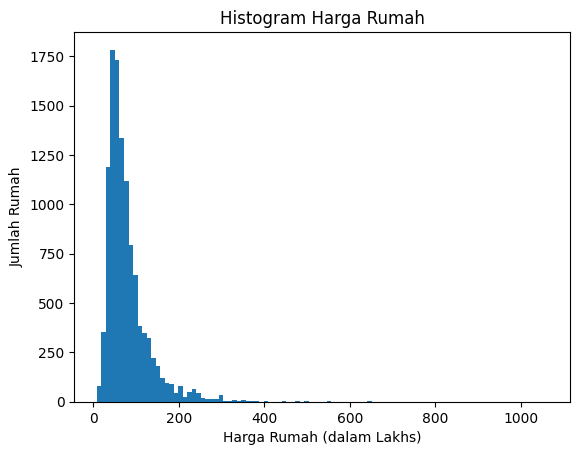

In [55]:
import matplotlib.pyplot as plt

# 2. Membuat histogram harga rumah dalam lakhs

# melihat harga rumah tertinggi sampai terendah tanpa histogram
# df['price'].sort_values(ascending=False)
# melihat rata-rata harga rumah
# df['price'].mean()
# histogram harga rumah dengan matplotlib
plt.hist(df['price'], bins=100)
plt.xlabel('Harga Rumah (dalam Lakhs)')
plt.ylabel('Jumlah Rumah')
plt.title('Histogram Harga Rumah')
plt.show()

In [58]:
# 3 melihat korelasi antar variabel
df.corr(numeric_only=True)

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.288189,0.304350,0.420359
bath,0.288189,1.000000,0.196672,0.536291
balcony,0.304350,0.196672,1.000000,0.097051
price,0.420359,0.536291,0.097051,1.000000


In [59]:
# 4. Membuat descriptive analysis dari dataset
print(df.describe())

         total_sqft          bath       balcony         price
count  11254.000000  11188.000000  10916.000000  11254.000000
mean    1263.131049      2.448963      1.551118     79.308672
std      312.854271      1.065138      0.792919     52.776043
min      505.000000      1.000000      0.000000      8.440000
25%     1080.000000      2.000000      1.000000     47.267500
50%     1215.000000      2.000000      2.000000     65.000000
75%     1464.000000      3.000000      2.000000     94.405000
max     2040.000000     18.000000      3.000000   1063.000000


In [63]:
#  5.cek apakah ada missing value
print(df.isnull().sum())

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


In [61]:
# ya ada missing value, maka kita akan mengisi missing value tersebut dengan teknik imputasi
# 5. mengisi missing value
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['society'] = df['society'].fillna(df['society'].mode()[0])


In [64]:
# 6. cek apakah ada duplikasi data
print(df.duplicated().sum())

498


In [65]:
# ya ada duplikasi data, maka kita akan menghapus duplikasi data
# 6. menghapus duplikasi data
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [80]:
# 7. Lakukan encoding untuk categorical variabel, menggunakan one hot dan label encoding.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# one hot encoding for area_type and location
df_onehot = pd.get_dummies(df, columns=['area_type'], drop_first=True)
df_onehot.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,False,False,True
2,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,False,False,False
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,False,False,True
4,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,False,False,True
5,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,False,False,True


In [81]:
features = df.select_dtypes(include=['object', 'bool']).columns
features = list(features.values)
label_encoder = LabelEncoder()
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature])
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,39,369,8,412,1056.0,2.0,1.0,39.07
2,0,79,1059,10,726,1440.0,2.0,3.0,62.00
3,3,79,678,10,1985,1521.0,3.0,1.0,95.00
4,3,79,641,8,726,1200.0,2.0,1.0,51.00
5,3,79,1124,8,550,1170.0,2.0,1.0,38.00


In [82]:
# 8. Pisah dataset menjadi train test (80:20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, 
                                                    random_state=42)

X_train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
7552,3,25,564,10,104,1890.0,4.0,3.0
10365,3,79,57,10,2103,1515.0,2.0,1.0
5232,3,27,477,8,1090,1161.0,2.0,1.0
411,3,79,924,8,783,1185.0,2.0,1.0
529,0,79,886,10,1512,1867.0,3.0,1.0


In [83]:
# 9. Lakukan standardization atu normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.59415758, -2.38962456, -0.09539976, ...,  2.00658211,
         1.42901885,  1.85164583],
       [ 0.59415758,  0.49122124, -1.64195178, ...,  0.80748692,
        -0.42659211, -0.67657137],
       [ 0.59415758, -2.28292657, -0.36078443, ..., -0.32445894,
        -0.42659211, -0.67657137],
       ...,
       [ 0.59415758, -1.37599363,  0.37131121, ..., -1.79854663,
        -1.35439759, -0.67657137],
       [-0.28466859,  0.49122124,  1.35964031, ..., -2.11830535,
         0.50121337,  0.58753723],
       [ 0.59415758,  0.49122124, -0.12285334, ..., -0.3596324 ,
        -0.42659211, -0.67657137]])

In [84]:
# normailzation dengan minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[1.        , 0.3164557 , 0.48329049, ..., 0.90228013, 0.17647059,
        1.        ],
       [1.        , 1.        , 0.04884319, ..., 0.65798046, 0.05882353,
        0.33333333],
       [1.        , 0.34177215, 0.40874036, ..., 0.42736156, 0.05882353,
        0.33333333],
       ...,
       [1.        , 0.55696203, 0.61439589, ..., 0.12703583, 0.        ,
        0.33333333],
       [0.66666667, 1.        , 0.89203085, ..., 0.06188925, 0.11764706,
        0.66666667],
       [1.        , 1.        , 0.47557841, ..., 0.42019544, 0.05882353,
        0.33333333]])